In [26]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
df = pd.read_csv("https://raw.githubusercontent.com/dm-fedorov/python_basic/master/data/vkontakte_group_01_2016-08-01_2020-03-15.csv")
df.head()

,Дата,Критерий,Парам. №1,Парам. №2,Значение
0,15.03.2020,views,NaN,NaN,4
1,15.03.2020,visitors,NaN,NaN,3
2,15.03.2020,gender,М,NaN,3
3,15.03.2020,age,24-27,NaN,1
4,15.03.2020,age,30-35,NaN,2


In [2]:
dfc= pd.get_dummies(df, columns=['Критерий'])
dfc['year'] = [i[6::] for i in dfc['Дата'].values]

In [6]:
views = dfc[['year', 'Значение']][dfc['Критерий_views'] == 1]
viewsperYear = views.groupby(['year'])['Значение'].sum()
print("Просмотры за год\n", viewsperYear)

Просмотры за год
 year
2016     7199
2017    11872
2018     7055
2019     8754
2020     1444
Name: Значение, dtype: int64


In [9]:
visitors = dfc[['year', 'Значение']][dfc['Критерий_visitors'] == 1]
visitorsperYear = visitors.groupby(['year'])['Значение'].sum()
print("Посетители за год\n", visitorsperYear)

Посетители за год
 year
2016    5254
2017    8524
2018    5117
2019    5733
2020     956
Name: Значение, dtype: int64


In [11]:
reach = dfc[['year','Значение']][dfc['Критерий_reach'] == 1]
reach = reach.groupby(['year'])['Значение'].sum()
print("Охват\n",reach)

Охват
 year
2016    15672
2017    27479
2018    12539
2019    21185
2020     1656
Name: Значение, dtype: int64


In [12]:
reach_sub = dfc[['year','Значение']][dfc['Критерий_reach_subscribers'] == 1]
reach_sub = reach_sub.groupby(['year'])['Значение'].sum()
print("Охват среди подписчиков\n",reach_sub)

Охват среди подписчиков
 year
2016    3522
2017    4487
2018    2125
2019    9568
2020     536
Name: Значение, dtype: int64


In [17]:
gender = dfc[['Дата', 'Значение','Парам. №1']][dfc['Критерий_gender'] == 1]
gender1 = gender.groupby(['Парам. №1'])['Значение'].sum()
print("Анализ по гендеру\n", gender1 )

Анализ по гендеру
 Парам. №1
Ж    10063
М    12637
Name: Значение, dtype: int64


In [16]:
age = dfc[['Парам. №1', 'Значение']][dfc['Критерий_age'] == 1]
age1 = age.groupby(['Парам. №1'])['Значение'].sum()
print("Анализ по возрасту аудитории\n", age1 )

Анализ по возрасту аудитории
 Парам. №1
1-18      741
18-21    3046
21-24    2560
24-27    1751
27-30    2419
30-35    3466
35-45    2402
45+      2350
Name: Значение, dtype: int64


In [18]:
country = dfc[['Парам. №1','Значение']][dfc['Критерий_countries'] == 1]
country = country.groupby(['Парам. №1'])['Значение'].sum()
country.sort_values(ascending=False)

Парам. №1
Россия                         22367
Украина                          994
Беларусь                         506
США                              340
Казахстан                        290
                               ...  
Непал                              1
Южно-Африканская Республика        1
Кувейт                             1
Кот-д'Ивуар                        1
Австралия                          1
Name: Значение, Length: 70, dtype: int64

In [21]:
feedback = dfc[['Парам. №1','Значение']][dfc['Критерий_feedback'] == 1]
feedback = feedback['Парам. №1'].value_counts()
print("Обратная связь\n", feedback)

Обратная связь
 Нравится              683
Рассказали друзьям    291
Комментарии            91
Упоминания              1
Name: Парам. №1, dtype: int64


In [22]:
print("Большая часть читателей из России и моложе 30 лет, следовательно данная группа подходит для продвижения нового товара, который будет интересен людям до 30 лет")

Большая часть читателей из России и моложе 30 лет, следовательно данная группа подходит для продвижения нового товара, который будет интересен людям до 30 лет


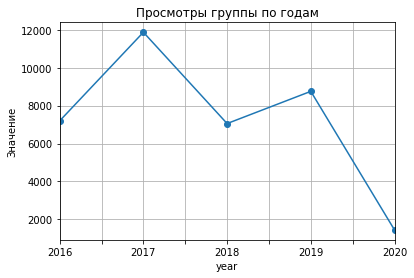

In [29]:
plt.title('Просмотры группы по годам')
plt.ylabel('Значение')
plt.xlabel('Год')
axis = plt.gca()
axis.tick_params(axis='x')
axis.tick_params(axis='y')

viewsperYear.plot(marker='o')
plt.grid(True)
plt.show()